###########################    EDA    ##############################

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Observations

1. Categorical features:
- sex
- smoker
- region
2. Numerical feeatures:
- age 
- bmi
- children
3. Output feature
- expenses (Insurance cost)

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()
## No Null Value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [11]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

In [12]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
duplicate = df[df.duplicated()]

In [15]:
df.duplicated().sum()

1

In [16]:
duplicate

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [17]:
#drop duplicate
df = df.drop_duplicates()

In [18]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


####### Checking Distibution of numerical fetaures #####

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<Figure size 360x360 with 0 Axes>

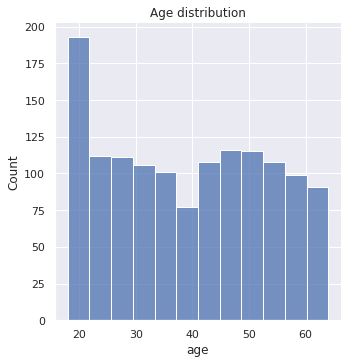

In [20]:
### age 
sns.set() # adding default theme
plt.figure(figsize = (5,5))
sns.displot(df['age'])
plt.title("Age distribution")
plt.show()

In [21]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

<Figure size 360x360 with 0 Axes>

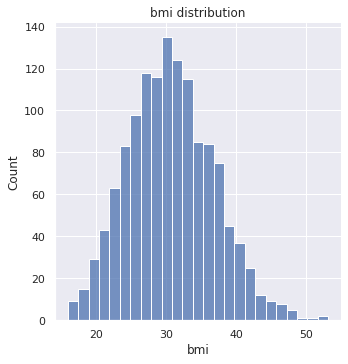

In [22]:
### bmi 
sns.set() # adding default theme
plt.figure(figsize = (5,5))
sns.displot(df['bmi'])
plt.title("bmi distribution")
plt.show()

In [23]:
df['bmi'].value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: bmi, Length: 275, dtype: int64

 General info about BMI
- below 18.5 –  underweight range
- between 18.5 and 24.9 –  healthy weight range
- between 25 and 29.9 –  overweight range
- between 30 and 39.9 – obese range

<Figure size 360x360 with 0 Axes>

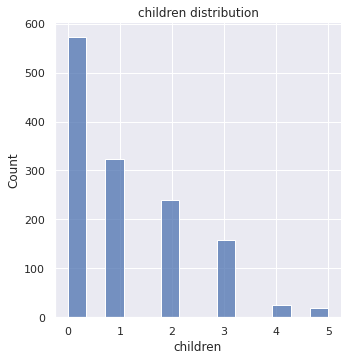

In [24]:
### children
sns.set() # adding default theme
plt.figure(figsize = (5,5))
sns.displot(df['children'])
plt.title("children distribution")
plt.show()

In [ ]:
df['children'].value_counts()

####### Checking Distibution of Categorical fetaures ####

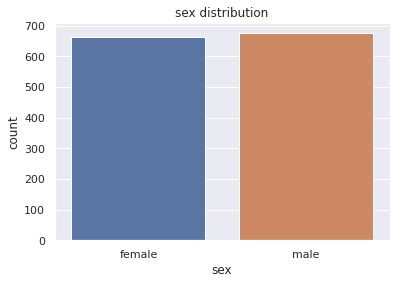

In [25]:
# sex
sns.set()
sns.countplot(x = 'sex', data= df)
plt.title('sex distribution')
plt.show()

In [26]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

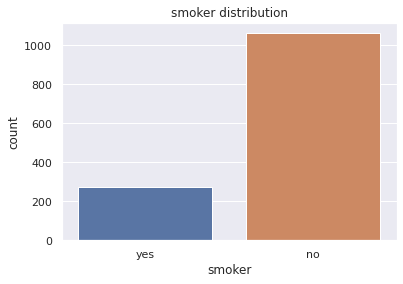

In [27]:
# smoker
sns.set()
sns.countplot(x = 'smoker', data= df)
plt.title('smoker distribution')
plt.show()

In [28]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

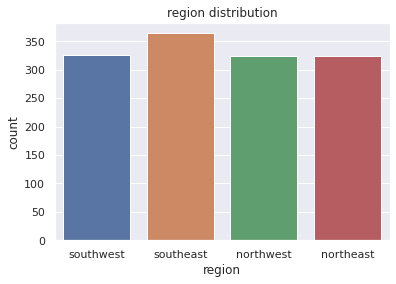

In [29]:
# region
sns.set()
sns.countplot(x = 'region', data= df)
plt.title('region distribution')
plt.show()

In [30]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

converting Categorical (norminal) feature to numberic

In [31]:
df.sex = df.sex.map({'male': 1, 'female':0}) #male = 1, female =0
df.smoker = df.smoker.map({'yes':1,'no': 0}) #yes = 1, no = 0
df.region = df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4}) #sw =1 ,SE = 2, NW = 3, NE =4

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


##### understanging co-relation #####

In [33]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,-0.001626,0.298308
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,-0.004936,0.058045
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,-0.157448,0.198637
children,0.041536,0.017848,0.012641,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,0.002358,0.787234
region,-0.001626,-0.004936,-0.157448,-0.016258,0.002358,1.000000,0.006547
expenses,0.298308,0.058045,0.198637,0.067389,0.787234,0.006547,1.000000


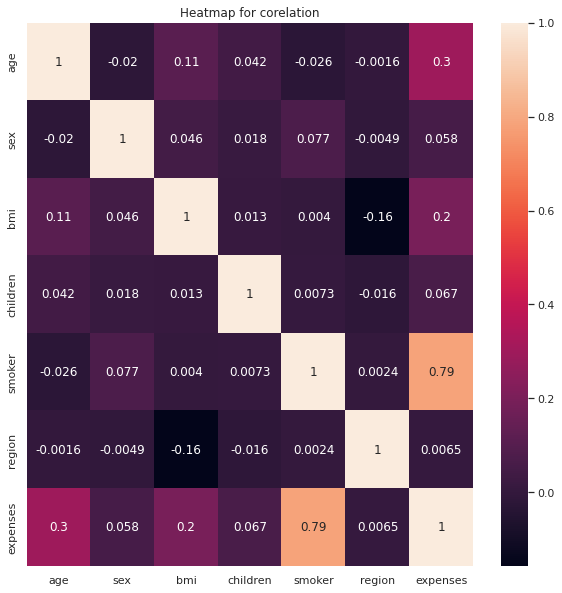

In [34]:
plt.figure(figsize  = (10,10))
sns.heatmap(df.corr(),annot = True)
plt.title('Heatmap for corelation')
plt.show()

In [35]:
#### Smoker is highly correalted to expenses 
### consider age and bmi for analysis

##### Checking ouliers ####

In [36]:
import seaborn as sns

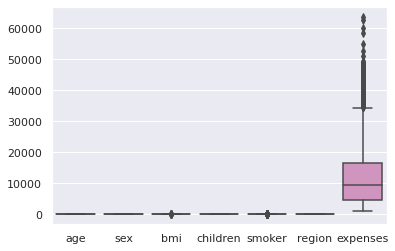

In [37]:
box_plot_all = sns.boxplot(data=df)

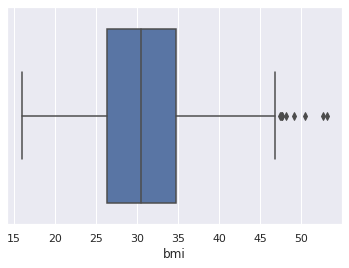

In [38]:
### BMI and expense have outliers from the above image 
sns.boxplot(x= df['bmi'])

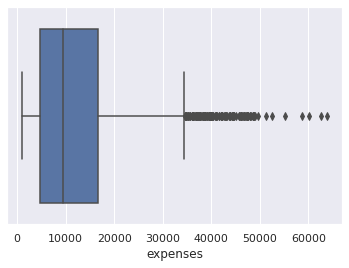

In [39]:
sns.boxplot(x= df['expenses'])

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
